In [ ]:
!pip install --upgrade tensorflow

In [ ]:
! pip uninstall tensorflow-addons -y


In [ ]:
! pip install tensorflow==2.15.0
! pip install --upgrade tensorflow-addons
! pip install --upgrade keras


  Using cached tensorflow_addons-0.23.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (1.8 kB)
Using cached tensorflow_addons-0.23.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (611 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 34.0 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.8.0 which is incompatible.
tensorflow-text 2.18.1 requires tensorflow<2.19,>=2.18.0, but you have tensorflow 2.15.0 which is incompatible.
tf-keras 2.18.0 requires tensorflow<2.19,>=2.18, but you have tensorflow 2.15.0 which is incompatible.


In [ ]:
import os
import math
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image, ImageEnhance
from tqdm import tqdm
import os
import random
import cv2

In [ ]:
# labels = {'glioma':0,'notumor':1,'meningioma':2,'pituitary':3}
labels = {'Bacterial spot rot':0,'Black Rot':1,'Downy Mildew':2,'No disease':3}

In [ ]:
x_train = []
y_train = []
image_size = 300
for i in labels:
    folderPath = os.path.join('/content/drive/MyDrive/archive/Splitted Dataset/train',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size, image_size))
        x_train.append(img)
        y_train.append(labels[i])

for i in labels:
    folderPath = os.path.join('/content/drive/MyDrive/archive/Splitted Dataset/test',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        x_train.append(img)
        y_train.append(labels[i])

x_train = np.array(x_train)
y_train = np.array(y_train)

100%|██████████| 61/61 [01:47<00:00,  1.75s/it]


In [ ]:
x_train, y_train = shuffle(x_train,y_train, random_state=101)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x_train,y_train, test_size=0.1,random_state=101)

In [ ]:
print(y_train)

[2 1 2 3 0 0 0 0 0 3 0 1 3 3 2 1 3 1 1 0 3 1 2 2 2 3 0 1 2 0 0 0 2 2 0 3 2
 0 0 2 3 3 2 1 2 3 0 2 0 3 2 3 3 2 0 2 3 3 2 3 2 0 0 2 1 2 3 0 2 0 1 1 3 0
 0 0 1 0 2 1 3 3 0 2 3 1 3 0 3 0 2 3 3 3 0 0 2 1 2 3 0 2 3 3 0 2 0 3 0 3 0
 3 2 2 0 1 2 3 3 2 3 3 1 0 1 3 3 1 2 3 2 0 2 1 0 2 3 3 0 3 3 2 1 3 3 3 2 0
 1 1 2 3 3 3 0 2 1 3 0 2 2 1 3 3 0 3 3 3 3 3 2 0 2 2 1 0 3 1 2 0 0 0 1 2 3
 0 2 2 3 3 0 2 0 2 3 3 3 2 0 3 1 0 3 2 0 2 0 1 3 3 2 2 2 1 3 2 1 3 3 0 0 2
 3 2 0 1 2 2 0 3 0 0 3 0 3 2 3 3 2 3 0 3 0 2 0 1 0 2 3 3 2 3 0 2 0 2 2 0 3
 3 0 3 3 2 0 2 2 3 3 3 2 3 3 0 1 0 3 3 2 3 3 3 2 2 0 0 3 1 0 3 2 0 0 3 3 0
 3 3 3 3 0 1 0 0 1 2 0 3 1 2 0 0 2 0 1 3 2 2 2 3 2 0 2 3 0 2 2 1 3 1 0 3 2
 3 0 2 3 1 3 2 0 1 3 2 0 2 1 2 2 2 2 3 2 3 0 0 2 3 2 2 0 1 3 0 0 3 3 0 3 0
 3 0 0 3 3 3 2 0 2 0 2 0 1 0 0 2 2 3 3 2 3 2 2 0 0 0 1 3 2 3 0 1 0 3 3 3 3
 0 0 3 3 0 3 3 2 2 1 3 0 3 0 3 1 0 0 2 2 3 0 2 0 3 3 2 3 1 0 1 3 2 1 0 0 1
 2 3 1 3 3 0 2 0 1 2 1 2 0 2 0 1 3 2 2 3 2 3 3 3 0 3 3 0 3 2 0 0 2 3 3 3 3
 3 3 1 2 1 2 0 2 1 3 0 3 

In [ ]:
# DATA
NUM_CLASSES = 4
INPUT_SHAPE = (32, 32, 3)
BUFFER_SIZE = 512
BATCH_SIZE = 256

# AUGMENTATION
IMAGE_SIZE = 72
PATCH_SIZE = 6
NUM_PATCHES = (IMAGE_SIZE // PATCH_SIZE) ** 2

# OPTIMIZER
LEARNING_RATE = 0.001
WEIGHT_DECAY = 0.0001

# TRAINING
EPOCHS = 30

# ARCHITECTURE
LAYER_NORM_EPS = 1e-6
TRANSFORMER_LAYERS = 4
PROJECTION_DIM = 64
NUM_HEADS = 4
TRANSFORMER_UNITS = [
    PROJECTION_DIM * 2,
    PROJECTION_DIM,
]
MLP_HEAD_UNITS = [
    2048,
    1024
]

In [ ]:
train_data_augmentation = keras.Sequential(
    [
        layers.Normalization(),
        layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(factor=0.02),
        layers.RandomZoom(
            height_factor=0.2, width_factor=0.2
        ),
    ],
    name="train_data_augmentation",
)

test_data_augmentation = keras.Sequential(
    [
        layers.Normalization(),
        layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    ],
    name="test_data_augmentation",
)
train_data_augmentation.layers[0].adapt(x_train)
test_data_augmentation.layers[0].adapt(x_train)

In [ ]:
def map_fn_train(image, label):
    return (train_data_augmentation(image), label)

def map_fn_test(image, label):
    return (test_data_augmentation(image), label)

In [ ]:
AUTO = tf.data.AUTOTUNE
train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_ds = train_ds.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).map(map_fn_train).prefetch(AUTO)


test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test))
test_ds = test_ds.batch(BATCH_SIZE).map(map_fn_test).prefetch(AUTO)

In [ ]:
class ShiftedPatchTokenization(layers.Layer):
    def __init__(
        self,
        image_size=IMAGE_SIZE,
        patch_size=PATCH_SIZE,
        num_patches=NUM_PATCHES,
        projection_dim=PROJECTION_DIM,
        vanilla=False,
    ):
        super().__init__()
        self.vanilla = vanilla
        self.image_size = image_size
        self.patch_size = patch_size
        self.half_patch = patch_size // 2
        self.flatten_patches = layers.Reshape((num_patches, -1))
        self.projection = layers.Dense(units=projection_dim)
        self.layer_norm = layers.LayerNormalization(epsilon=LAYER_NORM_EPS)

    def get_config(self):
        config = super().get_config()
        config.update({
            "vanilla": self.vanilla,
            "image_size": self.image_size,
            "patch_size": self.patch_size,
            "half_patch": self.half_patch
        })
        return config

    def crop_shift_pad(self, images, mode):
        if mode == "left-up":
            crop_height = self.half_patch
            crop_width = self.half_patch
            shift_height = 0
            shift_width = 0
        elif mode == "left-down":
            crop_height = 0
            crop_width = self.half_patch
            shift_height = self.half_patch
            shift_width = 0
        elif mode == "right-up":
            crop_height = self.half_patch
            crop_width = 0
            shift_height = 0
            shift_width = self.half_patch
        else:
            crop_height = 0
            crop_width = 0
            shift_height = self.half_patch
            shift_width = self.half_patch

        crop = tf.image.crop_to_bounding_box(
            images,
            offset_height=crop_height,
            offset_width=crop_width,
            target_height=self.image_size-self.half_patch,
            target_width=self.image_size-self.half_patch,
        )
        shift_pad = tf.image.pad_to_bounding_box(
            crop,
            offset_height=shift_height,
            offset_width=shift_width,
            target_height=self.image_size,
            target_width=self.image_size,
        )
        return shift_pad

    def call(self, images):
        if not self.vanilla:
            images = tf.concat(
                [
                    images,
                    self.crop_shift_pad(images, mode="left-up"),
                    self.crop_shift_pad(images, mode="left-down"),
                    self.crop_shift_pad(images, mode="right-up"),
                    self.crop_shift_pad(images, mode="right-down"),
                ],
                axis=-1
            )
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding="VALID",
        )
        flat_patches = self.flatten_patches(patches)
        if not self.vanilla:
            tokens = self.layer_norm(flat_patches)
            tokens = self.projection(tokens)
        else:
            tokens = self.projection(flat_patches)
        return (tokens, patches)

In [ ]:
class PatchEncoder(layers.Layer):
    def __init__(self, num_patches=NUM_PATCHES, projection_dim=PROJECTION_DIM):
        super().__init__()
        self.num_patches = num_patches
        self.position_embedding = layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim
        )
        self.positions = tf.range(start=0, limit=self.num_patches, delta=1)

    def get_config(self):
        config = super().get_config()
        config.update({
            "num_patches": self.num_patches,
            "positions": self.positions.numpy(),
        })
        return config

    def call(self, encoded_patches):
        encoded_positions = self.position_embedding(self.positions)
        encoded_patches = encoded_patches + encoded_positions
        return encoded_patches

In [ ]:
class MultiHeadAttentionLSA(tf.keras.layers.MultiHeadAttention):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.tau = tf.Variable(
            math.sqrt(float(self._key_dim)),
            trainable=True
        )
        diag_attn_mask = 1 - tf.eye(NUM_PATCHES)
        self.diag_attn_mask = tf.cast([diag_attn_mask], dtype=tf.int8)

    def get_config(self):
        config = super().get_config()
        config.update({
            "tau": self.tau.numpy(),
            "diag_attn_mask": self.diag_attn_mask.numpy(),
        })
        return config

    def _compute_attention(
        self,
        query,
        key,
        value,
        attention_mask=None,
        training=None
    ):
        query = tf.multiply(query, 1.0 / self.tau)
        attention_scores = tf.einsum(self._dot_product_equation, key, query)
        attention_scores = self._masked_softmax(attention_scores, attention_mask=self.diag_attn_mask)
        attention_scores_dropout = self._dropout_layer(attention_scores, training=training)
        attention_output = tf.einsum(self._combine_equation, attention_scores_dropout, value)
        return attention_output, attention_scores

In [ ]:
def mlp(x, hidden_units, dropout_rate):
    for units in hidden_units:
        x = layers.Dense(units, activation=tf.nn.gelu)(x)
        x = layers.Dropout(dropout_rate)(x)
    return x

In [ ]:
def create_vit_classifier(vanilla=False):
    inputs = layers.Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3), name="input_layer")
    # Create patches.
    (tokens, _)  = ShiftedPatchTokenization(vanilla=vanilla)(inputs)
    # Encode patches.
    encoded_patches = PatchEncoder()(tokens)

    for _ in range(TRANSFORMER_LAYERS):
        x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
        if not vanilla:
            attention_output = MultiHeadAttentionLSA(
                num_heads=NUM_HEADS, key_dim=PROJECTION_DIM, dropout=0.1
            )(x1, x1)
        else:
            attention_output = layers.MultiHeadAttention(
                num_heads=NUM_HEADS, key_dim=PROJECTION_DIM, dropout=0.1
            )(x1, x1)
        x2 = layers.Add()([attention_output, encoded_patches])
        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
        x3 = mlp(x3, hidden_units=TRANSFORMER_UNITS, dropout_rate=0.1)
        encoded_patches = layers.Add()([x3, x2])

    representation = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
    representation = layers.Flatten()(representation)
    representation = layers.Dropout(0.5)(representation)
    features = mlp(representation, hidden_units=MLP_HEAD_UNITS, dropout_rate=0.5)
    logits = layers.Dense(NUM_CLASSES, name="output_dense")(features)
    # Create the Keras model.
    model = keras.Model(inputs=inputs, outputs=logits)
    return model

In [ ]:
# Create the model
model = create_vit_classifier(vanilla=False)
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 72, 72, 3)      │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ shifted_patch_tokenizati… │ [(None, 144, 64),      │         35,704 │ input_layer[0][0]      │
│ (ShiftedPatchTokenizatio… │ (None, 12, 12, 540)]   │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ patch_encoder             │ (None, 144, 64)        │          9,216 │ shifted_patch_tokeniz… │
│ (PatchEncoder)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_1     │ (None, 144, 64)        │            128 │ patch_encoder[0][0]    │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multi_head_attention_lsa  │ (None, 144, 64)        │         66,368 │ layer_normalization_1… │
│ (MultiHeadAttentionLSA)   │                        │                │ layer_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 144, 64)        │              0 │ multi_head_attention_… │
│                           │                        │                │ patch_encoder[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_2     │ (None, 144, 64)        │            128 │ add[0][0]              │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 144, 128)       │          8,320 │ layer_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_1 (Dropout)       │ (None, 144, 128)       │              0 │ dense_1[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 144, 64)        │          8,256 │ dropout_1[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_2 (Dropout)       │ (None, 144, 64)        │              0 │ dense_2[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_1 (Add)               │ (None, 144, 64)        │              0 │ dropout_2[0][0],       │
│                           │                        │                │ add[0][0]              │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_3     │ (None, 144, 64)        │            128 │ add_1[0][0]            │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multi_head_attention_lsa… │ (None, 144, 64)        │         66,368 │ layer_normalization_3… │
│ (MultiHeadAttentionLSA)   │                        │                │ layer_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_2 (Add)               │ (None, 144, 64)        │              0 │ multi_head_attention_… │
│                      

 Total params: 21,356,540 (81.47 MB)

 Trainable params: 21,356,540 (81.47 MB)

 Non-trainable params: 0 (0.00 B)

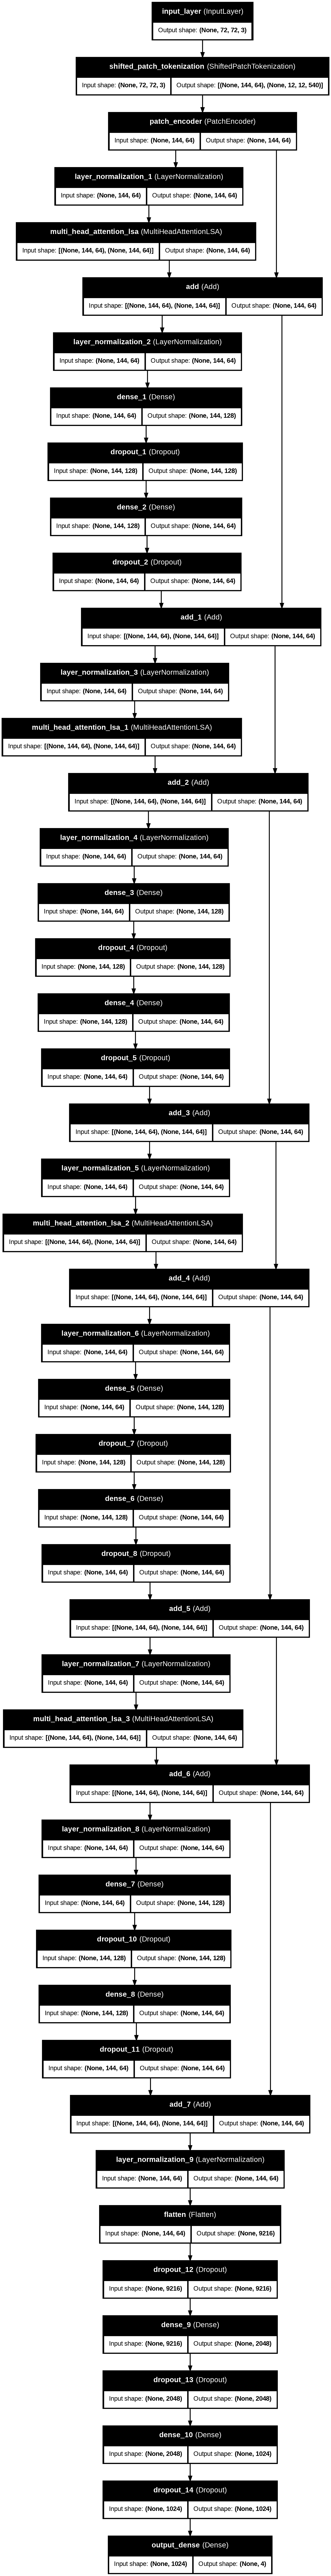

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


In [ ]:
class WarmUpCosine(keras.optimizers.schedules.LearningRateSchedule):
    def __init__(
        self, learning_rate_base, total_steps, warmup_learning_rate, warmup_steps
    ):
        super(WarmUpCosine, self).__init__()

        self.learning_rate_base = learning_rate_base
        self.total_steps = total_steps
        self.warmup_learning_rate = warmup_learning_rate
        self.warmup_steps = warmup_steps
        self.pi = tf.constant(np.pi)

    def __call__(self, step):
        if self.total_steps < self.warmup_steps:
            raise ValueError("Total_steps must be larger or equal to warmup_steps.")

        cos_annealed_lr = tf.cos(
            self.pi
            * (tf.cast(step, tf.float32) - self.warmup_steps)
            / float(self.total_steps - self.warmup_steps)
        )
        learning_rate = 0.5 * self.learning_rate_base * (1 + cos_annealed_lr)

        if self.warmup_steps > 0:
            if self.learning_rate_base < self.warmup_learning_rate:
                raise ValueError(
                    "Learning_rate_base must be larger or equal to "
                    "warmup_learning_rate."
                )
            slope = (
                self.learning_rate_base - self.warmup_learning_rate
            ) / self.warmup_steps
            warmup_rate = slope * tf.cast(step, tf.float32) + self.warmup_learning_rate
            learning_rate = tf.where(
                step < self.warmup_steps, warmup_rate, learning_rate
            )
        return tf.where(
            step > self.total_steps, 0.0, learning_rate, name="learning_rate"
        )

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import AdamW
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import SparseCategoricalAccuracy

def run_experiment(model):
    total_steps = int((len(x_train) / BATCH_SIZE) * EPOCHS)
    warmup_epoch_percentage = 0.10
    warmup_steps = int(total_steps * warmup_epoch_percentage)

    scheduled_lrs = WarmUpCosine(
        learning_rate_base=LEARNING_RATE,
        total_steps=total_steps,
        warmup_learning_rate=0.0,
        warmup_steps=warmup_steps,
    )
    optimizer = AdamW(learning_rate=LEARNING_RATE, weight_decay=WEIGHT_DECAY)

    model.compile(
        optimizer=optimizer,
        loss=SparseCategoricalCrossentropy(from_logits=True),
        metrics=[SparseCategoricalAccuracy(name="Test accuracy")],
    )

    history = model.fit(
        train_ds,
        validation_data=test_ds,
        epochs=EPOCHS
    )

    _, accuracy = model.evaluate(test_ds)
    print(f"Test accuracy: {round(accuracy * 100, 2)}%")

    return history


In [ ]:
vit_sl = create_vit_classifier(vanilla=False)
history = run_experiment(vit_sl)

Epoch 1/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 83s 19s/step - Test accuracy: 0.3156 - loss: 6.2757 - val_Test accuracy: 0.4304 - val_loss: 2.0881
Epoch 2/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 36s 11s/step - Test accuracy: 0.4257 - loss: 2.6382 - val_Test accuracy: 0.4810 - val_loss: 1.5480
Epoch 3/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 35s 10s/step - Test accuracy: 0.5522 - loss: 1.5713 - val_Test accuracy: 0.6203 - val_loss: 0.9558
Epoch 4/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 38s 12s/step - Test accuracy: 0.6303 - loss: 0.9823 - val_Test accuracy: 0.7342 - val_loss: 0.7526
Epoch 5/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 35s 11s/step - Test accuracy: 0.6672 - loss: 0.8950 - val_Test accuracy: 0.7215 - val_loss: 0.6721
Epoch 6/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 35s 11s/step - Test accuracy: 0.7371 - loss: 0.7059 - val_Test accuracy: 0.7848 - val_loss: 0.6043
Epoch 7/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 41s 10s/step - Test accuracy: 0.7468 - loss: 0.6667 - val_Test accuracy: 0.7722 - val_loss: 0.6270
Epoch 8/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 36s 11s/step - Test

In [ ]:
history.history

{'Test accuracy': [0.3323863744735718,
  0.42471590638160706,
  0.5681818127632141,
  0.6463068127632141,
  0.6761363744735718,
  0.7457386255264282,
  0.7542613744735718,
  0.7940340638160706,
  0.8039772510528564,
  0.8423295617103577,
  0.8394886255264282,
  0.8607954382896423,
  0.8664772510528564,
  0.9005681872367859,
  0.8778409361839294,
  0.9048295617103577,
  0.9034090638160706,
  0.8948863744735718,
  0.9133522510528564,
  0.8948863744735718,
  0.9176136255264282,
  0.9275568127632141,
  0.9318181872367859,
  0.9446022510528564,
  0.9431818127632141,
  0.9389204382896423,
  0.9460227489471436,
  0.9460227489471436,
  0.9673295617103577,
  0.9517045617103577],
 'loss': [7.507033824920654,
  2.5126829147338867,
  1.486287236213684,
  0.9486381411552429,
  0.8841100335121155,
  0.6881202459335327,
  0.6493366956710815,
  0.5813486576080322,
  0.5155933499336243,
  0.43606242537498474,
  0.4135726988315582,
  0.3817298710346222,
  0.39362993836402893,
  0.26505252718925476,
  0.

In [ ]:
def plot_loss_curves(history):

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['Test accuracy']
  val_accuracy = history.history['val_Test accuracy']

  epochs = range(len(history.history['loss']))
  font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 42}

  plt.figure(figsize=(12,6))
  plt.subplot(1,2,1)
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()
  plt.subplot(1,2,2)
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend()

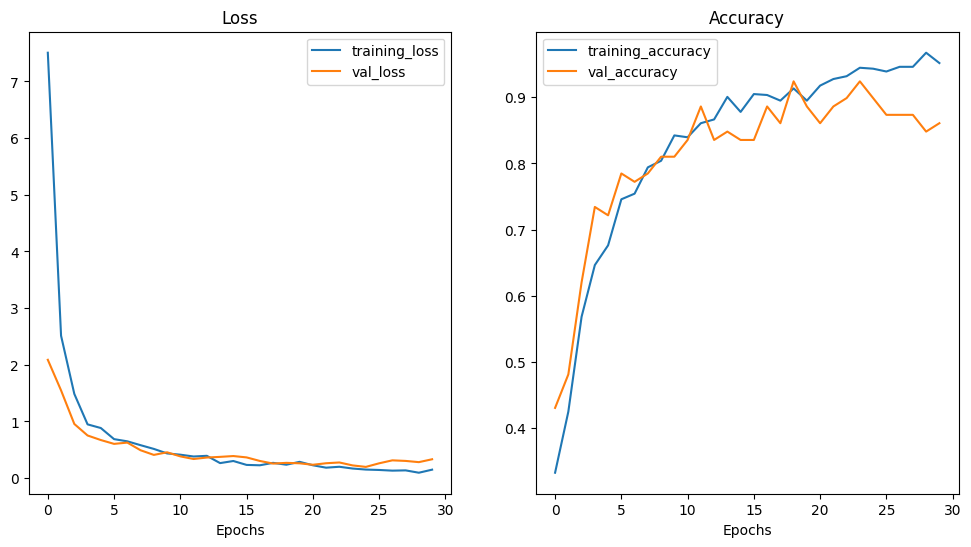

In [ ]:
plot_loss_curves(history)
plt.savefig('curves.png')

In [ ]:
y_test_pred_probs = model.predict(test_ds)
y_test_pred = tf.argmax(y_test_pred_probs, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


In [ ]:
y_test_pred

<tf.Tensor: shape=(79,), dtype=int64, numpy=
array([0, 0, 2, 0, 1, 3, 0, 1, 1, 0, 1, 2, 0, 1, 1, 1, 1, 1, 3, 0, 0, 2,
       2, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 2, 1, 1, 2, 2, 1, 1, 1, 0, 1, 1,
       0, 2, 0, 2, 1, 1, 0, 1, 2, 1, 1, 1, 0, 2, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 2, 1, 1, 0, 1, 0])>

In [ ]:
y_test_np = tf.concat([y for x, y in test_ds], axis=0).numpy()

from sklearn.metrics import confusion_matrix
cm_train = confusion_matrix(y_test_np, y_test_pred.numpy())

<Axes: >

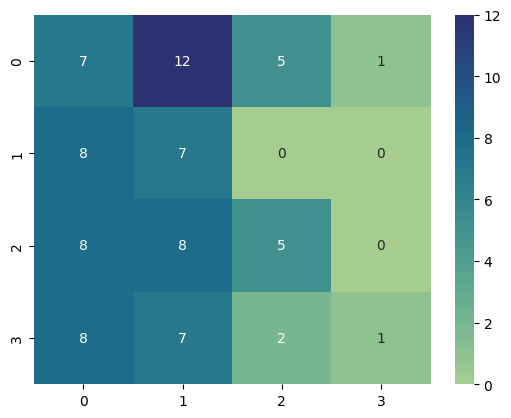

In [ ]:
import seaborn as sns

sns.heatmap(cm_train , annot=True , cmap="crest")